Chapter 13 of [A guided tour of mathematical methods in the physical sciences](https://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition?format=PB&isbn=9781107641600) introduces the Dirac Delta function. As discussed this function is not really a function, but a *distribution*. Still, there are functions that can mimick certain qualities of the Dirac Delta functions. We'll discuss three of them.

### 1. Gaussian
One way to approximate the Dirac Delta function is by making a Gaussian  skinnier and taller. In the notebook for Chapter 4, we already introduced the Gaussian function:

In its most general form, the Gaussian is $$ f(x)=ae^{-{\frac {(x-b)^{2}}{2c^{2}}}}.$$ In Python, that is

In [1]:
import numpy as np

def gaussian(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))

We can now play with the parameters to see how they affect the shape of the Gaussian:

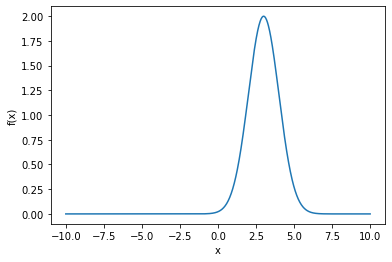

In [2]:
import matplotlib.pyplot as plt

x= np.linspace(-10,10,num=1000)
plt.plot(x,gaussian(x,2,3,1))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Let us play with a Gaussian function centered on zero (b=0), where we couple the amplitude and width:
$$ f(x) = \frac{1}{c\sqrt{\pi}}\exp{\left(-x^2/c^2\right)}$$

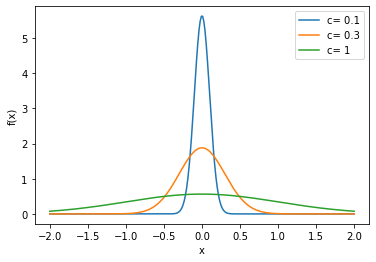

In [3]:
def gaussian2(x,c):
    return 1/(c*np.sqrt(np.pi))*np.exp(-(x)**2/(2*c**2))

x= np.linspace(-2,2,num=250)
cs = [0.1,0.3,1]
for c in cs:
    plt.plot(x,gaussian2(x,c),label='c= '+str(c))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

In the limit that c goes to zero, this function resembles a Delta Dirac function:
$$ \delta(x-b) \approx \lim_{c\downarrow 0}\frac{1}{c\sqrt{\pi}}e^ {- \frac{(x-b)^2}{c^2}}$$

You may ask yourself why the square root of pi in there? Well, if you integrate this Gaussian as we did in the notebook for Chapter 4, you will see it is needed to satisfy one of the properties of the Dirac Delta function, namely that the area under the curve is 1.

### 2. Sinc
Another popular way to approximate the shape of the Dirac Delta function is via the sinc function:
$$ f(x) = \mbox{sinc}(bx) = \frac{sin(bx)}{bx}:$$

In [4]:
def oursinc(b,x):
    return np.sin(b*x)/(b*x)

We can plot this sinc function, and compare it to the built-in version of numpy (it is slightly different):

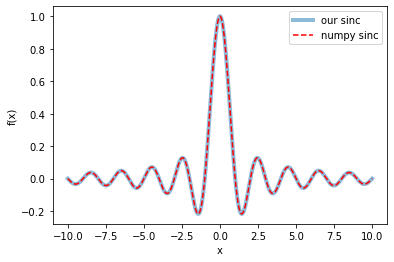

In [5]:
x= np.linspace(-10,10,num=1000)
plt.plot(x,oursinc(np.pi,x),linewidth=4,alpha=0.5,label='our sinc')
plt.plot(x,np.sinc(x),'--r',label='numpy sinc') # note that the sinc function built into numpy is "normalized: x'= bx=np.pi x"
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

When you play with the value for $b$ in our sinc function, you see how we can make it skinnier. The same parameter can be used to make the function taller.
####  Homework
Work out the limit of $b$ to approximate the Dirac Delta function (i.e., infinitely skinny and tall). Normalize your result (i.e., make sure the area under the curve is always unity), so that another property of the Dirac Delta function is conserved: its area is unity.

### 3. Rectangles
We could have also approximated the Dirac Delta function with a rectangle, as discussed in Section 13.1 in our book:

\begin{equation}
  B_{a}(x)\equiv \left\{ 
    \begin{array}{@{}l@{\qquad}l@{}}
      \dfrac{1}{2a} &\text{for}{\quad}\left| x\right| \leq a \\ 
      &  \\[-5pt] 
      0 & \text{for}{\quad}\left| x\right| >a
    \end{array}
  \right. .  \label{Del.7}
\end{equation}
Again, the factor of 2 is for normalization purposes.

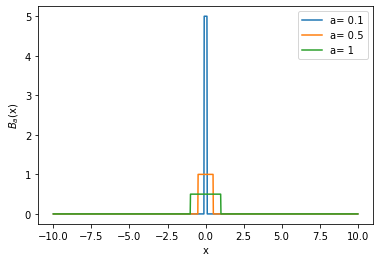

In [6]:
def box(x,a):
    B = np.zeros(len(x))
    for i in range(len(B)):
        if abs(x[i]) < a:
            B[i] = 1/(2*a)
    return B

aaa = [0.1, 0.5, 1]
for a in aaa:
    plt.plot(x,box(x,a),label='a= '+str(a))

plt.xlabel('x')
plt.ylabel('$B_a$(x)')      
plt.legend()
plt.show()

In either of these 3 examples, the approximation is called a [nascent delta function](https://en.wikipedia.org/wiki/Dirac_delta_function#Representations_of_the_delta_function), and when you read about these, you will see flashes of the sifting property of the Dirac Delta function expressed in these approximations.